Welcome to an interactive tutorial for the `b2_plotter` module, which has functionality in both python scripts
and jupyter notebooks. It is meant to primarily be used for notebooks, though.

Below is a sample analysis using the module to create plots with detailed comments.

Note that before you can use its functionality within a file, the `b2_plotter` module needs to be installed via:

`pip install b2_plotter`

in whichever workspace you are in.

Paul

In [1]:
# First we need to import libraries. Strictly speaking, the only ones this demo uses are pandas and uproot, but I have imported
# the others in case you need their extra functionalities.

# These modules, with the expection of b2_plotter, will automatically be available to you after setting up
# the belle 2 environment.

import numpy as np
import matplotlib.pyplot as plt 
import uproot as up 
import pandas as pd 


# Import the module's Plotter() class
from b2_plotter.Plotter import Plotter

# Setup matplotlib environment
%matplotlib inline 


Welcome to JupyROOT 6.24/06


In [2]:
# Define the absolute path to the files you will use.
# Note that the module currently does not support data -- that will be coming soon.
# For this example, only one file (signal MC) is used, but this module also supports generic MC.


# Signal MC example (one file)
smc = '/belle2work/aadnan/xi03pi/xi03pi_skimmed.root'

# Generic MC example (multiple files)
# These files no longer exist on the farm, its just an example.
#ccbar = '/belle2work/psgebeli/samples/gmc/mc15rib/xipipi/ccbar.root'
#uubar = '/belle2work/psgebeli/samples/gmc/mc15rib/xipipi/uubar.root'
#ddbar = '/belle2work/psgebeli/samples/gmc/mc15rib/xipipi/ddbar.root'
#ssbar = '/belle2work/psgebeli/samples/gmc/mc15rib/xipipi/ssbar.root'

# Define columns to reduce runtime. You dont need to read in every variable from the root files, just
# the ones that you think will be beneficial to plot. 
# However, you MUST read in the "isSignal" variable and the variable corresponding to your particle's mass.

#               REQUIRED
#       _______________________
#       |                     |
mycols= ['xic_M','xic_isSignal', 'xic_significanceOfDistance','xi_significanceOfDistance', 
         'lambda0_p_protonID_noSVD', 'xi_M']


In [3]:
# Create pandas dataframe(s) using uproot
with up.open(smc) as file:
    tree = file['xic_tree']
    df = tree.arrays(filter_name = mycols, library = 'pd')

# Define the dataframe that will be your signal as well. In the case of SMC, we only have one file, which will of course
# be our signal. For the case of generic MC, using ccbar is fine since we work in charm, but I recommend just using all of them
# via a concatenation (pandas supports dataframe concatenation)
signaldf = df


# Create a dictionary that the Plotter() class will use as input. A dictionary is a list of keys and values
# {key1: value1, key2:value2, ...}. In this case, the keys are the labels that will be used in the plots. This is the monte carlo
# dataframes, so the signal will be handled seperately (again, only relevant for the case of generic MC)
mcdfs = {'background' : df}


In [1]:
# Create the plotter object. This calls the __init__ method, which you can see documentation for in README.md in the git repository.

# __init__(self, isSigvar: str, mcdfs: dict, signaldf: pd.DataFrame, datadf: pd.DataFrame = None, interactive: bool = True), where

# isSigvar is the name of your isSignal variable
# mcdfs is the dictionary we defined earlier, consisting of one or more pairs of label : dataframe
# signaldf is whatever dataframe you want signal to be extracted from 
# datadf is the dataframe corresponding to data, if you are using real data
        
plotter = Plotter(mcdfs = mcdfs, signaldf = signaldf, isSigvar = 'xic_isSignal')

NameError: name 'Plotter' is not defined

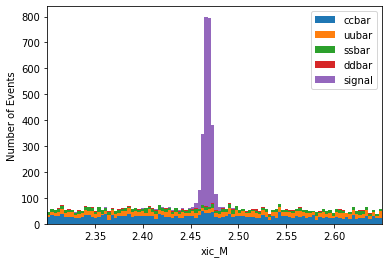

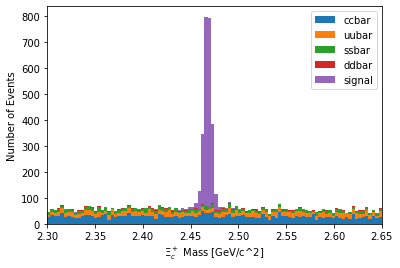

In [5]:
# plot() function 

# Now you can define cuts and make plots using plot(). 

# plot(var, cuts, myrange = (), nbins = 100, isLog = False, xlabel = '', scale = 1, bgscale = 1, color = ['b', '#ffa500', 'g', 'r', 'c', 'y', '#a52a2a', 'm' ]), where 

# var is the name of the variable you want to plot (as a string)
# cuts are the cuts to be applied (as a string)
# myrange (optional) is a tuple of the range you wish to use. it defaults to (), so if no range is explicity defined, it will be dynamically calculated
# nbins (optional) is the number of bins to use, defaults to 100
# isLog (optional) is a boolean deciding if the plot will be on a logarithmic scale or not, defaults to non-logarithmic
# xlabel (optional) is a string for labelling the x axis. if none is defined, the label will just be equal to the variable 'var'
# scale, bgscale (optional) are floats determining the amount by which to scale the signal and bkg, respectively, default to 1 
# color (optional) is a list of matplotlib colors, where the order matches the order of entries in mcdfs. it defaults to eight colors
# in the code (7 for each type of generic mc background and 1 for signal)

xicmassrangeloose = '2.3 < xic_M < 2.65'

masscuts = xicmassrangeloose + '& xi_M > 1.32 & xi_M < 1.325'
pidcuts = 'lambda0_p_protonID_noSVD > 0.96'
flightcuts = 'xi_significanceOfDistance > 5'

mycuts = f'{masscuts} and {pidcuts} and {flightcuts}'

# Bare minimum for SMC
plotter.plot('xic_M', cuts = mycuts, color = ['b', 'g'])

# More detailed 
plotter.plot('xic_M', cuts = mycuts, myrange = (2.3, 2.65), nbins = 100, isLog = False, xlabel = r'$\Xi_c^+$ Mass [GeV/c^2]', scale = 1, bgscale = 1, color = ['b', 'g'])


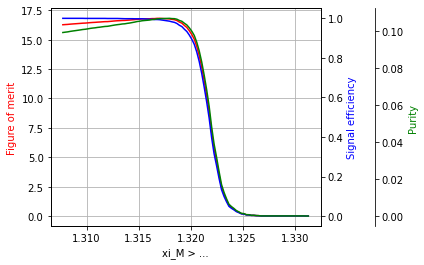

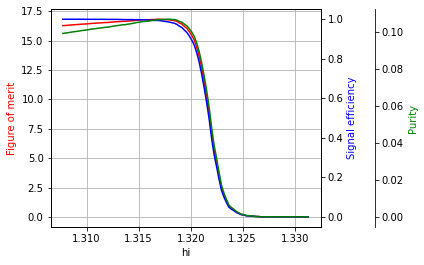

(1.317014147963265, 16.81408242566394)

In [9]:
# plotFom function 

# Used to create a figure of merit 

# plotFom(var, massvar, signalregion, cuts, myrange = (), isGreaterThan = True, nbins = 100, xlabel = '')

# var is the name of your variable to plot, as a string
# massvar is the name of the variable for your particle's mass, which is used to calculate signal yield 
# signal region is a tuple representing the signal region for your particle, a decent way to define this is 
# to perform a fit on your mass and define the signal region as (mean - 3*sigma, mean + 3*sigma)
# cuts is a string of cuts that you want applied to the dataframe before the fom is calculated 
# isGreaterThan is a bool that tells the FOM to test all of the cuts like: var > testcut_value 
# if this is false, then it calculates var < testcut_value
# You should have some intuition about which to use (e.g greaterthan = True for protonID), but if not, plot both!
# nbins, xlabel are the same as for plot()


# Bare minimum
plotter.plotFom(var = 'xi_M', massvar = 'xic_M', signalregion = (2.46, 2.475), cuts = xicmassrangeloose)

# Detailed
plotter.plotFom(var = 'xi_M', massvar = 'xic_M', myrange = (), signalregion = (2.46, 2.475), cuts = xicmassrangeloose, isGreaterThan = True, nbins = 100, xlabel = 'hi')

# Note that this function also returns a tuple (optimal_cut, max_fom), so you dont have to eyeball the FOM peak.

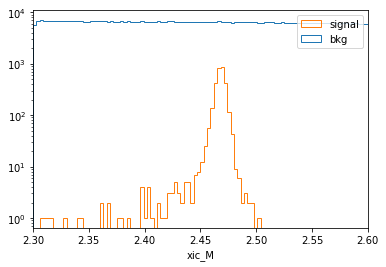

In [7]:
# plotStep 

# A useful plot for when the signal is buried underneath background, or you just dont care to see the distributions for each of the MC types cc, uu
# etc. individually 


# plotStep(var, cuts, myrange = (), nbins = 100, xlabel = '')

# All of these params are the same as they are in plot()

plotter.plotStep('xic_M', cuts = xicmassrangeloose, myrange = (2.3, 2.6))


In [8]:
# get_purity and get_sigeff 

# These functions return the purity and signal efficiency of a cut (or series of cuts)

# get_sigeff(self, cuts, massvar, signalregion)
# get_purity(self, cuts, massvar, signalregion)

testcut = 'lambda0_p_protonID > 0.9'

sigeff = plotter.get_sigeff(cuts = testcut, massvar = 'xic_M', signalregion = (2.46, 2.475))
purity = plotter.get_purity(cuts = testcut, massvar = 'xic_M', signalregion = (2.46, 2.475))

# I just like to print something like this -- this helps to see if the cut is good or not.
initial_purity = plotter.get_purity(cuts = xicmassrangeloose, massvar = 'xic_M', signalregion = (2.46, 2.475))
print(f'Applying {testcut} yields a purity of {purity}%, compared to {initial_purity}%, and has signal efficiency {sigeff}%.')

Applying lambda0_p_protonID > 0.9 yields a purity of 10.0231057286272%, compared to 7.579594275471591%, and has signal efficiency 94.44444444444444%.
